recall:

* variational inference minimizes $d_{KL}(q||p) = E_{q(z)}[\log\frac{q(z)}{p(z)}]$
* alternatively minimize $d_{KL}(p||q) = E_{p(z)}[\log \frac{p(z)}{q(z)}]$
* which is easier? better?

other divergence measures

* alpha divergence
* L1 distance $d_{L1}(p, q) = \sum_z \frac{|p(z) - q(z)|}{2} = \max_{A \subset Z} |p(A) - q(A)|$
    * event E: $P_p(E) = \alpha \implies P_q(E) \in \alpha \pm d_{L1}(p, q)$
    * $\alpha = \{x | p(x) \geq q(x)\}$  
      $\beta = \{x | p(x) < q(x)\}$
    * $d_{L1}(p, q) = \frac{1}{2}(\sum_{x \in \alpha} (p(x) - q(x)) + \sum_{x \in \beta} (q(x) - p(x)))$  
    $= \frac{1}{2} (p(\alpha - q(\alpha) + q(\beta) - p(\beta))$  
    $= \frac{1}{2} 2 (p(\alpha) - q(\alpha))$  
    $= p(\alpha) - q(\alpha)$  
    $= \max_{A \subset X} p(A) - q(A)$

properties of $d_{KL}$ criteria

* zero forcing and zero avoiding
* if $p$ is multimodal, $d(p||q)$ averages out the modes while $d(q||p)$ concentrates to one mode
* 

## calculus of variations / functional derivatives

$\arg\max_{y(\cdot)} F(y(x))$  
$\forall x$, $y(x)$ s.t. $\frac{\partial F}{\partial y(x)} = 0$

* $F(y(x)) = \int_x G(y(x), y'(x), x) dx$  
$\implies$ optimal $y(x)$ satisifies ...
* $F(y(x)) = \int_x G(y(x), x) dx$  
then optimal solution for $y$ satisfies $\frac{\partial G}{\partial y(x)} = 0$ $\forall x$

**e.g.** calculate optimal predictor for square loss

* $L(t, y(x)) = (t - y(x))^2$
* given $p(x, t)$
* given $x^*$, what label should we predict
* expected loss: $E[L] = \int_x \int_t (t - y(x))^2 p(x, t) dt dx$
* then $G(y(x), x) = \int_t (t - y(x))^2 p(x, t) dt$
* $\partial G_{y(x)} = -\int_t 2 (t - y(x)) p(x, t) dt = 0$
* $\implies \int_t t p(x, t) dt = \int_t y(x) p(x, t) dt$  
$= y(x) \int_t p(x, t) dt = y(x) p(x)$  
$\implies y(x) = \int_t t \frac{p(x, t)}{p(x)} dt$  
$= \int_t t p(t | x) dt$  
$= E[t | x]$

**e.g.** generic solution for mean field variational inference

* $p(x, z_1, z_2)$
* $x$ observed
* $z_1, z_2$ latent
* $q(z_1, z_2) = q(z_1) q(z_2)$
* $ELBO = E_q [\log \frac{p(x, z_1, z_2)}{q(z_1, z_2)}]$  
$= \int_{z_1} \int_{z_2} q(z_1) q(z_2) (\log p(x, z_1, z_2) - \log q(z_1) - \log q(z_2)) d z_2 d z_1 + \lambda (\int q(z_1) d z_1 - 1)$
* want to optimize w.r.t. $q(z_1)$
* $G = \int_{z_2} q(z_1) q(z_2) (\log p(x, z_1, z_2) - \log q(z_1) - \log q(z_2)) d z_2 + \lambda q(z_1)$
* $\partial G_{q(z_1)} = \int_{z_2} q(z_2) (\log p(x, z_1, z_2) - \log q(z_1) - \log q(z_2)) d z_2 - \int_{z_2} q(z_1) q(z_2) (q(z_1))^{-1} d z_2 + \lambda$  
$= E_{q(z_2)} [\log p(x, z_1, z_2)] - \log q(z_1) - H(q(z_2)) - 1 + \lambda$  
$\implies \log q(z_1) = constant + E_{q(z_2)}[\log p(x, z_1, z_2)]$

$d_{KL}(p||q) = E_{p(z)}[\log \frac{p(z)}{q(z)}]$

consider factorized approximation $q(z) = \prod_i q(z_i)$

$d = \int p(z) \log p(z) dz - \int p(z) \sum_i \log q(z_i) dz$  
first term can be treated as constant so we get  
$= constant - \sum_i \int_{z_i} p(z_i) \log q(z_i) d z_i$  
$\implies$ to optimize $d$ w.r.t. $\{q(z_i)\}$, can optimize each term separately

$\arg\min_{q(z_i)} -\int p(z_i) \log q(z_i) d z_i + \lambda (\int q(z_i) d z_i - 1)$

$G = p(z_i) \log q(z_i)$  
$\partial G_{q(z_i)} = -\frac{p(z_i)}{q(z_i)} + \lambda = 0$  
$\implies q(z_i) = \frac{p(z_i)}{\lambda} \propto p(z_i)$

then each $q(z_i)$ is just the marginal density of each $z_i$

consider $\min d_{KL}(p || q)$ and the case where $q(z) = h(z) g(\eta) e^{\eta^\top u(z)}$  
$q$ is in the exponential family

in this case $q(z)$ is obtained by setting $E_{q(z)}[u(z)] = E_{p(z)}[u(z)]$  
expected sufficient statistics $u(z)$ of $q(\cdot)$  
expectation is w.r.t. $p$  
$E_{q(z)}[u(z)]$ are the mean parameters $u$  
$\eta = \psi^{-1} (\mu)$

*proof*

$d_{KL}(p||q) = E_p[\log p(\cdot)] - E_p[\log q(z)]$  
$= constant - E_p[\log h(z)] - E_p[\log g(\eta)] - E_p[\eta^\top u(z)]$  
$= constant - \log g(\eta) - \eta^\top E_p[u(z)]$

$\nabla_\eta g(\eta) - E_p[u(z)] = 0$  
$\implies E_q[u(z)] - E_p[u(z)] = 0$

product and quotient of two gaussians is an (unnormalized) gaussian

## ADF

$t_i = p(x_i | \theta)$

$p(\theta | x_1, ..., x_n) = \propto p_0(\theta) \prod p(x_i | \theta)$

$p_1(\theta) \propto p_0(\theta) p(x_1 | \theta)$  
$p_2(\theta) \propto p_1(\theta) p(x_2 | \theta)$  
etc.  
$p_N(\theta) \propto p_{N-1}(\theta) p(x_N | \theta)$  
then $p_N(\theta) \propto p_B(\theta | x_1, ..., x_n)$  
this is if $X_i$ are iid

$q_1(\theta)$ depends on $q_0(\theta) t_1(\theta)$  
each $q_i(\theta)$ depends on $q_{i-1}(\theta) t_i(\theta)$

exact posterior: $\hat{p}(\theta) \propto q(\theta) t_i(\theta) = \frac{q(\theta) t_i(\theta)}{\int q(\theta) t_i(\theta) d\theta} = \frac{q(\theta) t_i(\theta)}{z_i}$

use simple family of distributions for $q$ so that the step can be repeated  
$\implies$ replace $\hat{p}$ with $q^{new}(\theta)$

(e.g., $\min d_{KL}(q^{new}(\theta) || \hat{p}(\theta))$ "streaming variational bayes")

we want $q^{new}(\theta) = \arg\min_{q^*} d_{KL}(\hat{p}(\theta) || q^*(\theta))$ (approximation)

first calculate exact $p$ then find approximation $q$

first find approx $t_i$: $\tilde{t}_i(\theta) = z_i \frac{q^{new}(\theta)}{q(\theta)}$

then calculate $q^{new}$ exactly: 
$\hat{\hat{p}} = \frac{q(\theta) \tilde{t}_i(\theta)}{\int q(\theta) \tilde{t}_i(\theta) d\theta} = \frac{q(\theta) \tilde{t}_i(\theta)}{z_i} = q^{new}(\theta)$

then each $q_i(\theta)$ depends on $q_{i-1}(\theta)$ and $\tilde{t}_i(\theta)$

consider seeing $x_1$ again  
want to "forget" $t_1(\theta)$ and its effect on posterior  
then calculate new $\tilde{t}_1(\theta)$ and new $q^{new}(\theta)$

### setup for EP

consider model $p(\theta) \prod p(x_i | \theta)$

posterior $p(\theta | x_1, ..., x_n)$ not calculable

EP uses posterior in same exponential family as prior  
using $q(\theta) \propto p(\theta) \prod_i \tilde{f}_i(\theta) = \prod_i \tilde{f}_i(\theta)$

**e.g.** 

* prior: $e^{a_0^\top \eta}$
* $\tilde{f}_i(x_i | \eta) \propto e^{\eta^\top u(x_i)}$  
$\implies product = e^{(u_0 + \sum u(x_i))^\top \eta}$

**e.g.** 

* $\mathcal{N}(\mu | \mu_0, \sigma_0^2) \prod_i \frac{1}{z_i} \mathcal{N}(\mu | \mu_i, \sigma_i^2)$
* complete the square

in both examples, easy to calculate explicit form of approximate posterior

### EP algorithm for ADF

1. compute/maintain $q^{old}(\theta) \propto \prod_i \tilde{f}_i(\theta)$
2. remove one term from old posterior  
$q^{-j}(\theta) \propto \prod_{i \neq j} \tilde{f}_i(\theta) = \frac{q^{old}(\theta)}{\tilde{f}_j(\theta)}$  
$f$ are true terms, $\tilde{f}$ are approximate terms
3. calculate $\hat{p}(\theta) = z_j^{-1} f_j(\theta) q^{-j}(\theta)$  
$z_j = \int f_j(\theta) q^{-j}(\theta) d\theta$
4. calculate $q^{new}(\theta) = \arg\min_q d_{KL}(\hat{p}(\theta) || q(\theta))$  
perform moment matching
    * $E_{\hat{p}(\theta)}[u(x)] = E_{q^{new}(\theta)}[u(x)]$
    * need sufficient statistics
    * $\hat{p}$ gives $E[X], E[X^2]$ gives $\mu$, $\sigma^2$  
    then plug those into $q^{new}(\theta) = \mathcal{N}(\theta | \mu, \sigma^2)$
5. $\tilde{f}_j^{new}(\theta) = z_j \frac{q^{new}(\theta)}{q^{-j}(\theta)}$

**e.g.** clutter problem

setup

* prior: $\mu \sim mathcal{N}(0, b)$
* $t_i(\mu) = p(x_i | \mu) = (1 - w) \mathcal{N}(x_i | \mu, 1) + w \mathcal{N}(x_i | 0, a)$
* $a, b, w$ known

EP

1. $q(\mu) = \mathcal{N}(m, v) \propto \prod_i f_i(\mu) = \prod_i s_i \mathcal{N}(\mu | m_i, v_i)$
2. $q^{-j}(\mu) = \frac{q(\mu)}{\tilde{f}_j(\mu)}$  
this is a quotient of two normals  
$= \mathcal{N}(\mu | m^{(-j)}, v^{(-j)})$
    * $\frac{1}{v^{(-j)}} = \frac{1}{v} + \frac{1}{v_j}$
    * $m^{(-j)} = m + \frac{v}{v^{(-j)}} (m - m_j)$
3. $\hat{p}(\mu) = z_j^{-1} f_j(\mu) q^{-j}(\mu)$  
$z_j = \int \mathcal{N}(\mu | m^{(-j)}, v^{(-j)}) ((1 - w) \mathcal{N}(x_i | \mu, 1) + w \mathcal{N}(x_i | 0, a)) d\mu$  
$= (1 - w) \mathcal{N}(x_j | m^{(-j)}, 1 + v^{(-j)}) + w \mathcal{N}(x_i | 0, a)$ 
4. $\int t_i(\mu) q^{-j}(\mu) \begin{bmatrix} \mu \\ \mu^2 \end{bmatrix} d \mu$  
$q^{new}(\mu) = \mathcal{N}(m^{new}, v^{new})$
5. $\tilde{f}_j^{new}(\mu) = z_j \frac{\mathcal{N}(\mu | m^{new}, v^{new})}{\mathcal{N}(\mu | m^{(-j)}, v^{(-j)}}$ $= z_j \frac{\mathcal{N}(\mu | m_j^{new}, v_j^{new})}{\mathcal{N}(m^{new} | m^{(-j)}, (v + v^{(-j)}))}$  

## inference on a chain

**e.g.**

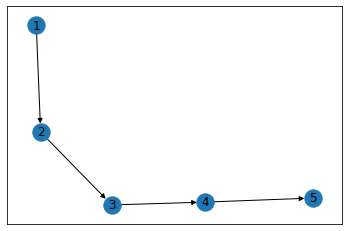

In [1]:
import networkx as nx
import pandas as pd

chain = nx.DiGraph()
chain.add_edge('1', '2')
chain.add_edge('2', '3')
chain.add_edge('3', '4')
chain.add_edge('4', '5')
nx.draw_networkx(chain)

$P(X_1 = 1) = .7$  
$P(X_i = 1 | X_{i=1} = 1) = .9$  
$P(X_i = 1 | X_{i-1} + 0) = .3$

* $P(X_3)$
* $P(X_3 | x_1 = 0)$
* $P(X_3 | x_5 = 1)$

possible strategy: start by computing full joint probability  
but expensive to compute

$P(X_3 = 1) = \sum_{x_1, x_2, x_4, x_5} P(X_1) P(X_2 | x_1) P(X_3 | x_2) P(X_4 | x_3) P(X_5 | x_4)$  
$ = \sum_{x_1, x_2, x_4} P(X_1) P(X_2 | x_1) P(X_3 | x_2) P(X_4 | x_3) \sum_{x_5} P(X_5 | x_4)$  
the last term is just 1  
same thing for $x_4$  
then we are left with  
$= \sum_{x_2} P(X_3 | x_2) \sum_{x_1} P(X_1) P(X_2 | x_1)$  
the last term is $P(X_2 = 1) = (.3) (.3) + (.7) (.9) = .72$  
and $P(X_2 = 0) = .28$  
$P(X_2) = \begin{bmatrix} .28 \\ .72 \end{bmatrix}$

$P(X_3) = \sum_{x_2} P(X_3 | x_2) f(x_2)$  
$P(X_3 = 1) = (.28) (.3) + (.72) (.9) = .732$  
$P(X_3 = 0) = .268$

$P(X_3 | x_1 = 0)$  
$= P(X_2 | x_1 = 0) P(X_3 | x_2)$  

Then $P(X_3 = 1 | x_1 = 0) = (.7) (.3) + (.3) (.9) = .48

$P(X_3 | x_5 = 1)$  
$= \frac{P(X_3 = 1, X_5 = 1)}{P(X_5 = 1)} \propto P(X_3 = 1, X_5 = 1)$
$= \sum_{x_1, x_2, x_4} P(X_1) P(X_2 | x_1) P(X_3 | x_2) P(X_4 | x_3) P(X_5 = 1 | x_4)$

$P(X_5 = 1 | x_4) = \begin{bmatrix} .3 \\ .9 \end{bmatrix}$  

Then the above becomes  
$= \sum_{x_1, x_2} P(X_1) P(X_2 | x_1) P(X_3 | x_2) \sum_{x_4} P(X_4 | x_3) \begin{bmatrix} .3 \\ .9 \end{bmatrix}$

The last sum becomes $P(X_4 | x_3 = 0) = (.7) (.3) + (.3) (.9) = .48$ and $P(X_4 | x_3 = 1) = (.1) (.3) + (.3)(.9) = .84$

Then the above becomes  
$= \sum_{x_1, x_2} P(X_1) P(X_2 | x_1) P(X_3 | x_2) \begin{bmatrix} .48 \\ .84 \end{bmatrix}$  
$= \sum_{x_2} P(X_3 | x_2) \begin{bmatrix} .48 \\ .84 \end{bmatrix} \sum_{x_1} P(X_1) P(X_2 | x_1)$  
$= \sum_{x_2} P(X_3 | x_2) \begin{bmatrix} .48 \\ .84 \end{bmatrix} \begin{bmatrix} .28 \\ .72 \end{bmatrix}$  
$= \begin{bmatrix} .48 \\ .84 \end{bmatrix} \sum_{x_2} P(X_3 | x_2) \begin{bmatrix} .28 \\ .72 \end{bmatrix}$  

the last term is  
$P(X_3 = 0 | x_2) = (.28) (.7) + (.72) (.1) = .268$  
$P(X_3 = 1 | x_2) = .732$

Then we get  
$= \begin{bmatrix} .12864 \\ .61478 \end{bmatrix}$

Then we normalize the two

## variable elimination algorithm

**e.g.**

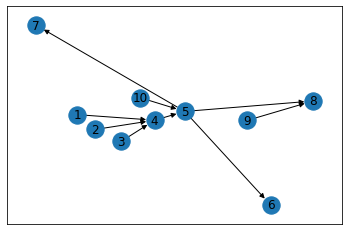

In [11]:
g = nx.DiGraph()
g.add_edge('1', '4')
g.add_edge('2', '4')
g.add_edge('3', '4')
g.add_edge('4', '5')
g.add_edge('10', '5')
g.add_edge('5', '6')
g.add_edge('5', '7')
g.add_edge('5', '8')
g.add_edge('9', '8')

nx.draw_networkx(g, pos = nx.spring_layout(g))

$P(X_5 | x_1 = 1, x_6 = 1)$

**algorithm**

* perform sums in a strategic manner so that intermediate computations and "messages" are inexpensive
    * any order of summing out the variables is correct, but some are more efficient
* for poly-trees, work from fringes toward center (node of interest)
    * conditionals on $X_7, X_8, X_9$ just sum to 1
    * $\sum_{x_2, x_3} P(X_2) P(X_3) P(X_4 | x_2, x_3) = f_1(x_4)$
    * $P(X_6 = 1 | x_5) = f_2(x_5)$
    * $P(X_5) = \sum_{x_{10}, x_4} f_1(x_4) P(X_{10}) f_2(x_5) P(X_5 | x_4, x_{10})$  
        * if we start by $\sum_{x_4}$ before anything else, we get $P(X_4 | x_2, x_3, x_1 = 1) P(X_5 | x_4, x_{10}) = f^*(x_2, x_3, x_5, x_{10})$

## markov random fields and factor graphs

**def** markov random field

* MRF given by undirected (hyper)graph  
$p(x) \propto \prod_i f_i(c_i)$  
$c_i$ is a subset of nodes (clique)  
$p(x) \frac{1}{z} \prod_i f_i(c_i)$  
$z = \sum_{x_i} \prod_i f_i(c_i)$

* BN can easily be translated into MRF

**def** factor graph

* two nodes
    * random variable nodes
    * factor nodes
* e.g., $f_1(x_1) f_2(x_1, x_2) f_3(x_1, x_3) f_4(x_2, x_3, x_4)$

### belief propagation algorithm

first construct algorithm assuming factor graphs are trees  
then discuss applicability to general graphs

$p(\text{all variables}) = \prod_{s \text{ s.t. } x \in s} F_{s \setminus x}$

$p(x) = \sum_{\text{all variables not } x} p(\text{all variables}) = \sum \prod_s F_{s \setminus x}$

if there are observed variables, then plug in values and create smaller factor graph

$p(x) = \sum \prod_s F_{s \setminus x} = \prod_s \sum_{x_i \in F_{s \setminus x}} F_{s \setminus x}$

$= \prod_s \mu_{f_s \to x}$

$\mu_{f_s \to x}(x) = \sum_{x_i \in F_{s \setminus x}} F_{s \setminus x} = \sum_{x_i} f_s(x, x_{l_1}, ..., x_{l_k}) \prod_j G_{x_{l_j} \setminus s}$  
$= \sum_{x_{l_j} \in s} f_s(x, x_{l_1}, ..., x_{l_k}) \prod_j \sum_{x_i \in G_{x_{l_j}} \setminus s} G_{x_{l_j} \setminus s}$

$\mu_{x_{l_j} \to s} = \sum_{x_i \in G_{x_{l_j} \setminus s} G_{x_{l_j}} \setminus s} G_{x_{l_j} \setminus s}$

then the above becomes  
$= \sum_{x_{l_j} \in s} f_s(x, x_{l_1}, ..., x_{l_k}) \prod_j \mu_{x_{l_j} \to s}(x_{l_j})$

$\mu_{x_{l_j} \to s} = \sum_{x_i \in G_{x_{l_j} \setminus s}} G_{x_{l_j} \setminus s}$
$= \sum \prod_{h \text{ neighbor of } x_{l_j} \setminus s} F_{h \setminus x_{l_j}}$  
$= \prod_{h \cdots} \sum_{z \text{ variables in } F_{h \setminus x_{l_j}}} F_{h \setminus x_{l_j}}$
$= \prod_h \mu_{h \to x_{l_j}} (x_{l_j})$

... recursion

base of recursion

* factor with one variable: $f(x_i)$, send $f(x_i)$ to $x_i$ $\begin{bmatrix} p(0) \\ p(1) \end{bmatrix}$
* variable with only one factor: sends "no information" $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$  
binary variable: message has two values
* $\mu_{f_s \to x} = \sum_{\text{variables of } f_s \text{ other than x}} f_s(x, ...) \prod_j \mu_{x_{l_j} \to s}(x_{l_j})$
* $\mu_{x_{l_j} \to s} (x_{l_j}) \prod_{h \text{ neighbors except } s} \mu_{h \to x_{l_j}}(x_{l_j})$

**e.g.**

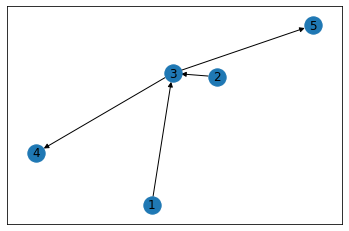

In [20]:
g = nx.DiGraph()
g.add_edge('1', '3')
g.add_edge('2', '3')
g.add_edge('3', '4')
g.add_edge('3', '5')
nx.draw_networkx(g, pos=nx.spring_layout(g))

$P(X_1 = 1) = .7$  
$P(X_2 = 1) = .4$  
$P(X_3 = 1 | x_1 = x_2) = .9$  
$P(X_3 = 1 | x_1 \neq x_2) = .2$  
$P(X_4 = 1 | x_3 = 1) = .7$  
$P(X_4 = 1 | x_3 = 0) = .5$  
$P(X_5 = 1 | x_3 = 1) = .2$  
$P(X_5 = 1 | x_3 = 0) = .8$

want: $P(X_1 | x_5 = 1)$

![](bp-example.png)

![](bp-example-2.png)

### inference on graphs with loops

* use variable elimination with a well chosen ordering
* join random variables into "mega random variables" so that underlying graph is a tree
* jointree: build tree structure which preserves correct result

* approximation
    * belief propagation: need to "allow nodes to send messages"  
    standard trick: initialize all messages to be non-informative  
    pick any ordering for messages  
    repeat until convergence (or stopping criterion)